## Statistics
Having a solid understanding of statistics in data science allows us to understand our data better, and allows us to create a quantifiable evaluation of any future conclusions.

In [4]:
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using PyCall
using MLBase

In this notebook, we will use eruption data on the faithful geyser. The data will contain wait times between every consecutive times the geyser goes off and the length of the eruptions.
<img src="data/faithful.JPG" width="400">

Let's get the data first...

In [5]:
D = dataset("datasets","faithful")
@show names(D)
D

names(D) = ["Eruptions", "Waiting"]


,Eruptions,Waiting
,Float64,Int64
1,3.6,79
2,1.8,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.7,88
8,3.6,85
9,1.95,51


In [6]:
describe(D)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Eruptions,3.48778,1.6,4.0,5.1,0,Float64
2,Waiting,70.8971,43,76.0,96,0,Int64


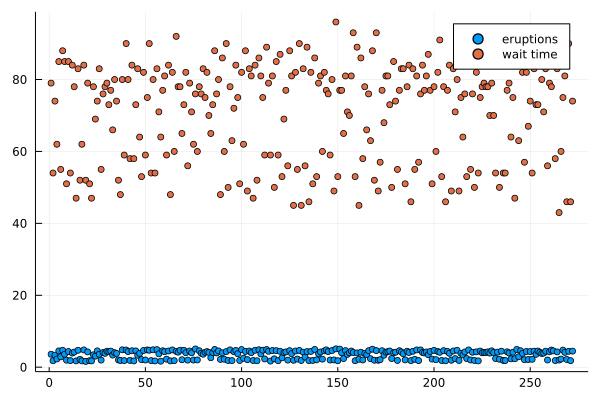

In [7]:
eruptions = D[!,:Eruptions]
scatter(eruptions,label="eruptions")
waittime = D[!,:Waiting]
scatter!(waittime,label="wait time")

### 🔵Statistics plots
As you can see, this doesn't tell us much about the data... Let's try some statistical plots

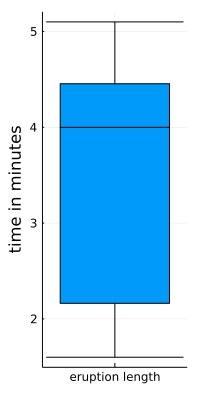

In [8]:
boxplot(["eruption length"],eruptions,legend=false,size=(200,400),whisker_width=1,ylabel="time in minutes")

Statistical plots such as a box plot (and a violin plot as we will see in notebook `12. Visualization`), can provide a much better understanding of the data. Here, we immediately see that the median time of each eruption is about 4 minutes.

The next plot we will see is a histogram plot.

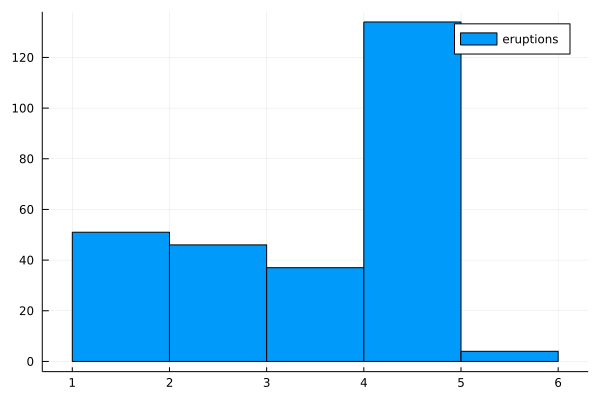

In [9]:
histogram(eruptions,label="eruptions")

You can adjust the number of bins manually or by passing a one of the autobinning functions.

In [10]:
?histogram

ErrorException: syntax: invalid identifier name "?"

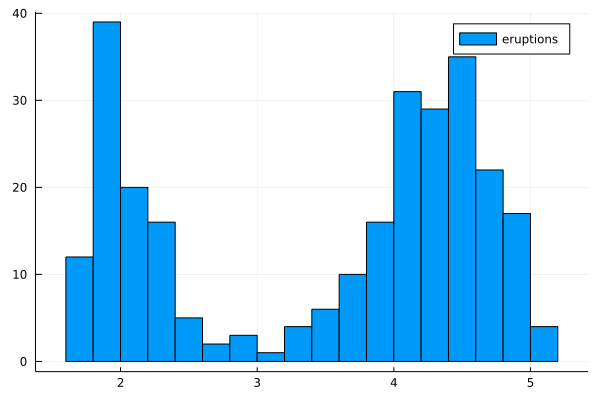

In [11]:
histogram(eruptions,bins=:sqrt,label="eruptions")

### 🔵Kernel density estimates
Next, we will see how we can fit a kernel density estimation function to our data. We will make use of the `KernelDensity.jl` package. 

In [12]:
p=kde(eruptions)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}(0.2608918621442271:0.0030181808870110138:6.439108137855772, [1.1161139442217305e-5, 1.1244427155304715e-5, 1.1344179473224414e-5, 1.146054328619861e-5, 1.1593684794655723e-5, 1.1743789689280804e-5, 1.1911063348919726e-5, 1.2095731053138326e-5, 1.2298038211913664e-5, 1.2518250611666393e-5  …  1.1215022627800858e-5, 1.113759304488017e-5, 1.1076192604059926e-5, 1.1030781609218734e-5, 1.1001338720907292e-5, 1.0987860983071793e-5, 1.0990363864661276e-5, 1.1008881316295835e-5, 1.1043465842321826e-5, 1.1094188587988663e-5])

If we want the histogram and the kernel density graph to be aligned we need to remember that the "density contribution" of every point added to one of these histograms is `1/(nb of elements)*bin width`. Read more about kernel density estimates on its wikipedia page https://en.wikipedia.org/wiki/Kernel_density_estimation

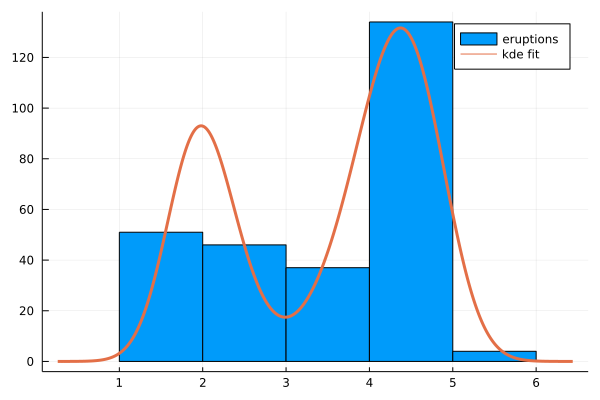

In [13]:
histogram(eruptions,label="eruptions")
plot!(p.x,p.density .* length(eruptions), linewidth=3,color=2,label="kde fit") # nb of elements*bin width

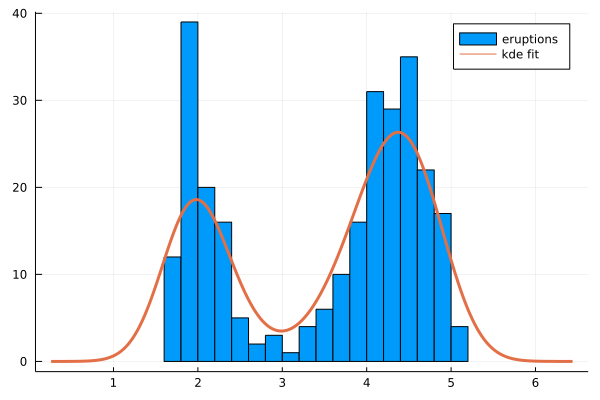

In [14]:
histogram(eruptions,bins=:sqrt,label="eruptions")
plot!(p.x,p.density .* length(eruptions) .*0.2, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

Next, we will take a look at one probablity distribution, namely the normal distribution and verify that it generates a bell curve.

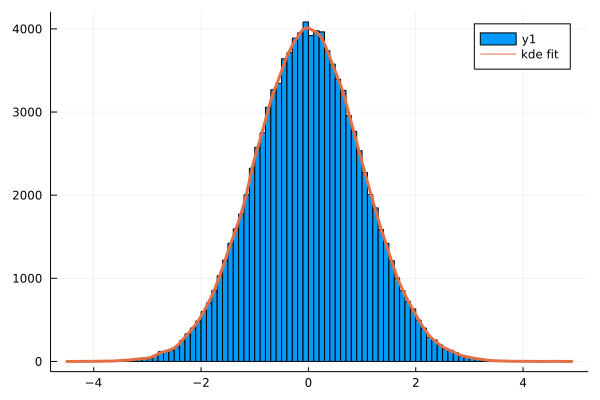

In [15]:
myrandomvector = randn(100_000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

### 🔵Probability distributions
Another way to generate the same plot is via using the `Distributions` package and choosing the probability distribution you want, and then drawing random numbers from it. As an example, we will use `d = Normal()` below.

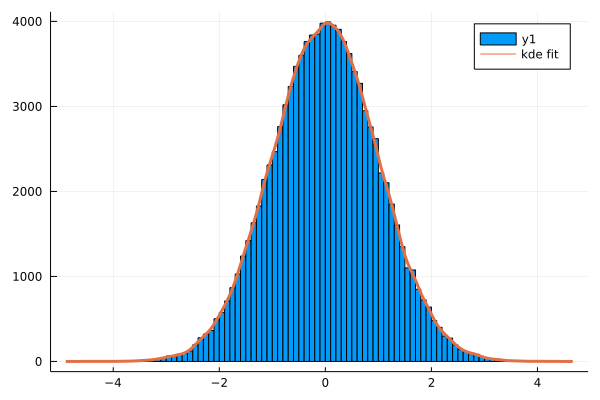

In [16]:
d = Normal()
myrandomvector = rand(d,100000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

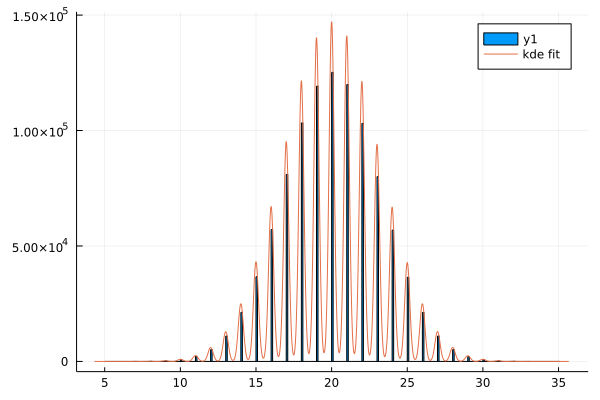

In [17]:
b = Binomial(40) 
myrandomvector = rand(b,1000000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.5,color=2,label="kde fit") # nb of elements*bin width

Next, we will try to fit a given set of numbers to a distribution.

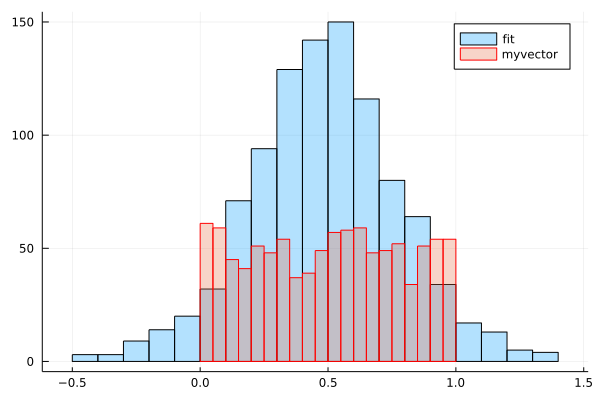

In [18]:
x = rand(1000)
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3,label="fit")
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3,label="myvector")

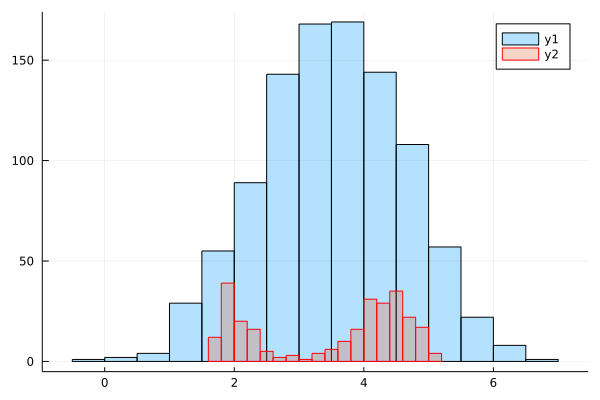

In [19]:
x = eruptions
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3)
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3)

### 🔵Hypothesis testing
Next, we will perform hypothesis testing using the `HypothesisTests.jl` package.

In [20]:
?OneSampleTTest

ErrorException: syntax: invalid identifier name "?"

In [21]:
myrandomvector = randn(1000)
OneSampleTTest(myrandomvector)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          -0.00275922
    95% confidence interval: (-0.0633, 0.0578)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.9288

Details:
    number of observations:   1000
    t-statistic:              -0.08941275890290276
    degrees of freedom:       999
    empirical standard error: 0.03085940558070281


In [22]:
OneSampleTTest(eruptions)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          3.48778
    95% confidence interval: (3.3515, 3.624)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   272
    t-statistic:              50.39726752574924
    degrees of freedom:       271
    empirical standard error: 0.06920579744632577


A note about p-values: Currently using the pvalue of spearman and pearson correlation from Python. But you can follow the formula here to implement your own.
https://stackoverflow.com/questions/53345724/how-to-use-julia-to-compute-the-pearson-correlation-coefficient-with-p-value

Hint: Sometimes there are some issues getting Python and Julia to communicate as desired. One of the problems that might come up `Cannot load libmkl_intel_thread.dylib` can be solved by: 
```
using Conda
Conda.rm("mkl")
Conda.add("nomkl")
```

In [23]:
scipy_stats = pyimport("scipy.stats")
@show scipy_stats.spearmanr(eruptions,waittime)
@show scipy_stats.pearsonr(eruptions,waittime)

PyCall.PyError: PyCall.PyError("PyImport_ImportModule\n\nThe Python package scipy.stats could not be imported by pyimport. Usually this means\nthat you did not install scipy.stats in the Python version being used by PyCall.\n\nPyCall is currently configured to use the Julia-specific Python distribution\ninstalled by the Conda.jl package.  To install the scipy.stats module, you can\nuse `pyimport_conda(\"scipy.stats\", PKG)`, where PKG is the Anaconda\npackage the contains the module scipy.stats, or alternatively you can use the\nConda package directly (via `using Conda` followed by `Conda.add` etcetera).\n\nAlternatively, if you want to use a different Python distribution on your\nsystem, such as a system-wide Python (as opposed to the Julia-specific Python),\nyou can re-configure PyCall with that Python.   As explained in the PyCall\ndocumentation, set ENV[\"PYTHON\"] to the path/name of the python executable\nyou want to use, run Pkg.build(\"PyCall\"), and re-launch Julia.\n\n", PyObject(Ptr{PyCall.PyObject_struct} @0x00000001647ff080), PyObject(Ptr{PyCall.PyObject_struct} @0x00007fe3b7bc6350), PyObject(Ptr{PyCall.PyObject_struct} @0x0000000000000000))

In [24]:
scipy_stats.pearsonr(eruptions,waittime)

UndefVarError: UndefVarError: scipy_stats not defined

In [25]:
corspearman(eruptions,waittime)

0.7779720576516121

In [26]:
cor(eruptions,waittime)

0.900811168321813

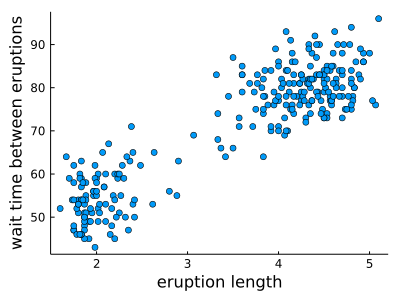

In [27]:
scatter(eruptions,waittime,xlabel="eruption length",
    ylabel="wait time between eruptions",legend=false,grid=false,size=(400,300))

Interesting! This means that the next time you visit Yellowstone National part ot see the faithful geysser and you have to wait for too long for it to go off, you will likely get a longer eruption! 

### 🔵AUC and Confusion matrix
Finally, we will cover basic tools you will need such as AUC scores or confusion matrix. We use the `MLBase` package for that.

In [28]:
gt = [1, 1, 1, 1, 1, 1, 1, 2]
pred = [1, 1, 2, 2, 1, 1, 1, 1]
C = confusmat(2, gt, pred)   # compute confusion matrix
C ./ sum(C, dims=2)   # normalize per class
sum(diag(C)) / length(gt)  # compute correct rate from confusion matrix
correctrate(gt, pred)
C = confusmat(2, gt, pred)   

2×2 Matrix{Int64}:
 5  2
 1  0

In [29]:
gt = [1, 1, 1, 1, 1, 1, 1, 0];
pred = [1, 1, 0, 0, 1, 1, 1, 1]
ROC = MLBase.roc(gt,pred)
recall(ROC)
precision(ROC)

0.8333333333333334

# Finally...
After finishing this notebook, you should be able to:
- [ ] generate statistics plots such as box plot, histogram, and kernel densities
- [ ] generate distributions in Julia, and draw random numbers accordingly
- [ ] fit a given set of numbers to a distribution
- [ ] compute basic evaluation metrics such as AUC and confusion matrix
- [ ] run hypothesis testing
- [ ] compute correlations and p-values

# 🥳 One cool finding
<img src="data/faithful.JPG" width="300">

If you go Yellowstone national park and you find out that the old faithful geyser is taking too long to erupt, then the wait might be worth it because you are likely to experience a longer eruption (i.e. there seems to be a high correlation between wait time and eruption time).

<img src="data/0301.png" width="400">
